In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Load Dataset

In [2]:
emotions = load_dataset("emotion")
emotions

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/williamthompson/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
labels = emotions["train"].features["label"].names
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [4]:
emotions.set_format(type="pandas")
df_train = emotions["train"][:]
df_valid = emotions["validation"][:]
df_test = emotions["test"][:]
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [5]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df_train["label_name"] = df_train["label"].apply(label_int2str)
df_valid["label_name"] = df_valid["label"].apply(label_int2str)
df_test["label_name"] = df_test["label"].apply(label_int2str)

df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)

In [6]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(df_train['text'])
y_train = df_train['label']

X_valid = vectorizer.transform(df_valid['text'])
y_valid = df_valid['label']

X_test = vectorizer.transform(df_test['text'])
y_test = df_test['label']

In [8]:
# shape: |corpus| X |vocab|
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(16000, 15186)
(2000, 15186)
(2000, 15186)


# [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [9]:
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [10]:
print("train accuracy: {0:0.2f}".format(clf.score(X_train, y_train)))
print("valid accuracy: {0:0.2f}".format(clf.score(X_valid, y_valid)))
print("test accuracy:  {0:0.2f}".format(clf.score(X_test, y_test)))

train accuracy: 0.88
valid accuracy: 0.76
test accuracy:  0.77


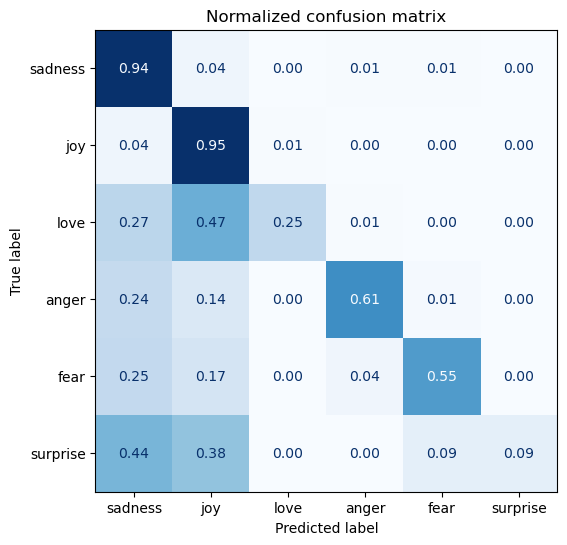

In [11]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)